In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
from binary_c_API import evolve_binary
import xml.etree.ElementTree as ET, urllib.request, gzip, io
from query_catalog_CBPs import find_CBPs

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Make cells narrower for better typography
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

In [4]:
def outcome(df):
    """Returns the final outcome of binary evolution. Defined below."""

    # Test wheater a merger occured
    if np.any(df['merged']) == True or np.any(df['coel']) == True:
        outcome = 3

        # SN occured if there is a NS left over
        if np.any(df['type1'] == 13 ) or np.any(df['type2'] == 13 ):
            outcome = 4      

    # Test weather RLOF occured
    elif np.any(df['in_RLOF']) == True:
        outcome = 2

    else:
        outcome = 1
        
    return outcome
        
values = np.linspace(0.1, 5, 100)
X,Y = np.meshgrid(values, values)
Z = np.zeros((len(values), len(values)))

P = 100
e = 0.1

# This will run for a while
for m1 in range(len(values)):
    for m2 in range(len(values)):
        if(m2 <= m1):
            df = evolve_binary(13700, values[m1], values[m2], 0.02, P, e)
            Z[m1, m2] = outcome(df)

KeyboardInterrupt: 

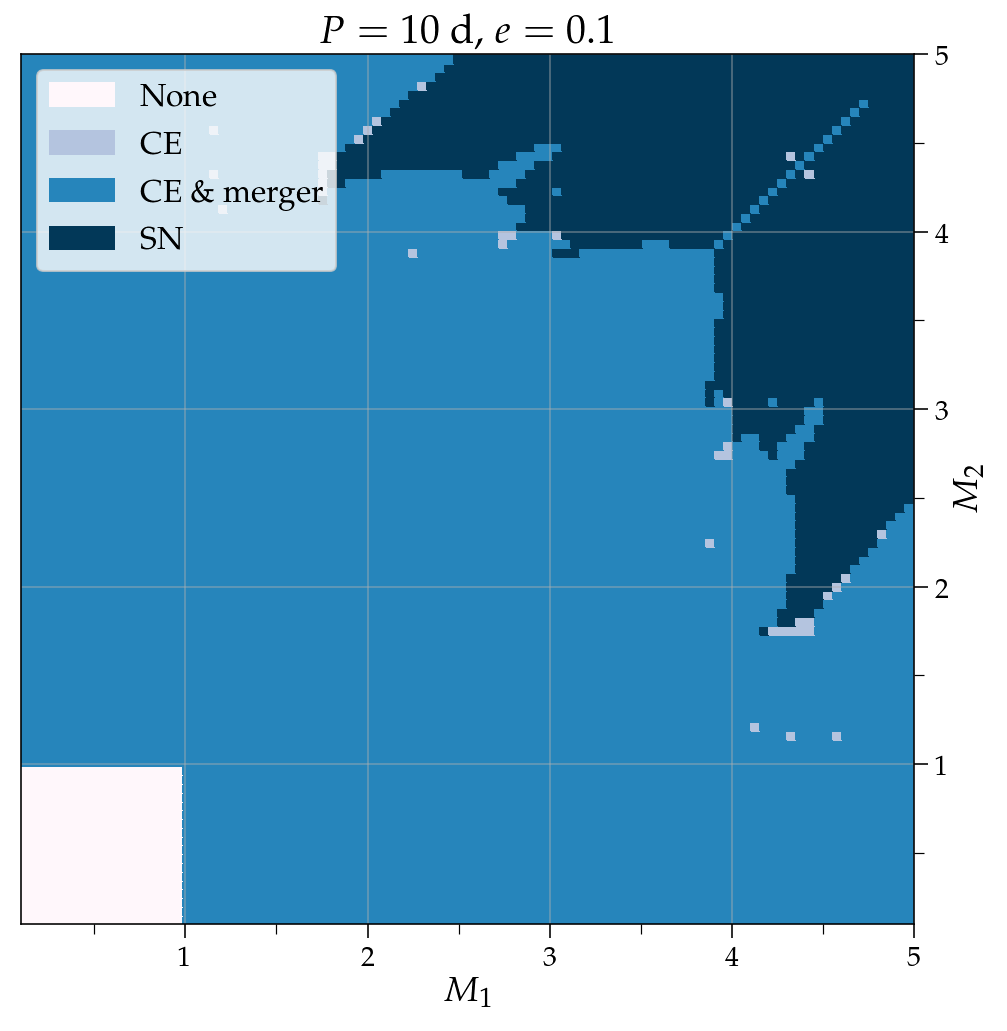

In [3]:
def discrete_cmap(N, base_cmap=None):
    """
    Create an N-bin discrete colormap from the specified input map.
    credit: Jake Vanderplas.
    """

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


# Fill in the other half of the triangle
for m1 in range(len(values)):
    for m2 in range(len(values)):
        if(m2 > m1):  
            Z[m1, m2] = Z[m2, m1]
            
def plot_outcomes(P, e):
    fig, ax = plt.subplots(figsize=(8,8))
    
    # Set colormap
    colors = 'PuBu'
    N = 4
    
    pcolor = ax.pcolormesh(X, Y, Z.T, cmap=discrete_cmap(N, colors), 
                            vmin=1-0.5, vmax=N+1-0.5)
#     cbar = plt.colorbar(pcolor, ticks=[1, 2, 3, 4])
    
    ax.set_xlabel(r'$M_1$')
    ax.set_ylabel(r'$M_2$')
    ax.set_title(r'$P={0}$ d, $e={1}$'.format(P, e))

    # Custom legend
    base = plt.cm.get_cmap(colors)
    text1 = mpl.patches.Patch(color=base(np.linspace(0, 1, 4))[0, :], label='None')
    text2 = mpl.patches.Patch(color=base(np.linspace(0, 1, 4))[1, :], label='CE')
    text3 = mpl.patches.Patch(color=base(np.linspace(0, 1, 4))[2, :], label='CE \& merger')
    text4 = mpl.patches.Patch(color=base(np.linspace(0, 1, 4))[3, :], label='SN')

    ax.legend(handles=[text1, text2, text3, text4], loc='upper left', prop={'size':16})
    
    # Minor ticks
    minor_locator = mpl.ticker.AutoMinorLocator(2)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.yaxis.set_minor_locator(minor_locator)
    
    
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=5)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.grid(True, alpha=0.5)
    
    # Save to pdf
    pcolor.set_edgecolor('face') # remove white lines in some pdf viewers
    plt.savefig('figures/stellar_evolution/outcomes_{0}_{1}.pdf'.format(P, e), 
                bbox_inches='tight')

plot_outcomes(P, e)